In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import GridSearchCV
from imutils import paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
def imgm(img,size=(32,32)):
    img=cv2.resize(img,size)
    pix=img.flatten()
    return pix

In [15]:
path=list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/DataSets"))
IMG=[]
label=[]

for (i, image_path) in enumerate(path):
    image = cv2.imread(image_path)
    lab = image_path.split(os.path.sep)[-2].split(".")[0]
    # extract raw pixel intensity "features
    pixels = imgm(image)
    IMG.append(pixels)
    label.append(lab)

x = np.array(IMG)
y = np.array(label)


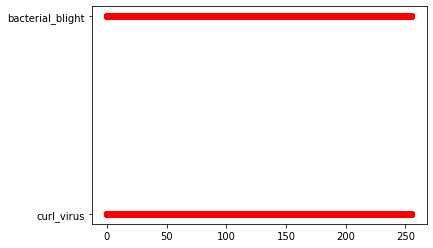

In [17]:
_=plt.plot(x,y,"ro")


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
sv=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model= GridSearchCV(estimator=sv, param_grid=params_NB, verbose=1, scoring='accuracy') 


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
model.fit(xtrain,ytrain)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [26]:
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.7225433526011561

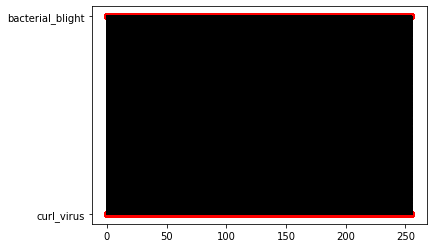

In [23]:
_=plt.plot(xtest,ytest,"ro",xtest,pred,"--k")

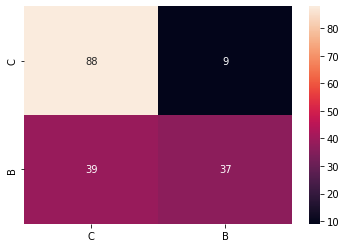

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as ss
con=confusion_matrix(ytest,pred)
imgs=ss.heatmap(con,annot=True,yticklabels="CB",xticklabels="CB")


In [27]:
figure = imgs.get_figure()    
figure.savefig('confusion naive bayes.png', dpi=400)

In [28]:
from sklearn.metrics import classification_report
report=classification_report(ytest,pred)
print(report)

                  precision    recall  f1-score   support

bacterial_blight       0.69      0.91      0.79        97
      curl_virus       0.80      0.49      0.61        76

        accuracy                           0.72       173
       macro avg       0.75      0.70      0.70       173
    weighted avg       0.74      0.72      0.71       173

